In [2]:
import sys
import numpy as np

In [3]:
def read_array_from_file(filename, dtype=float):
  """
  Reads an array of the specified data type from a binary file.

  Args:
      filename (str): The name of the file to read from.
      dtype (dtype, optional): The data type of the elements in the array.
          Defaults to float.

  Returns:
      numpy.ndarray: The array read from the file.
  """

  with open(filename, "rb") as file:
    # Read the size of the array
    size = np.fromfile(file, dtype=np.int64, count=1)[0]

    # Read the array elements
    data = np.fromfile(file, dtype=dtype, count=size)

  return data


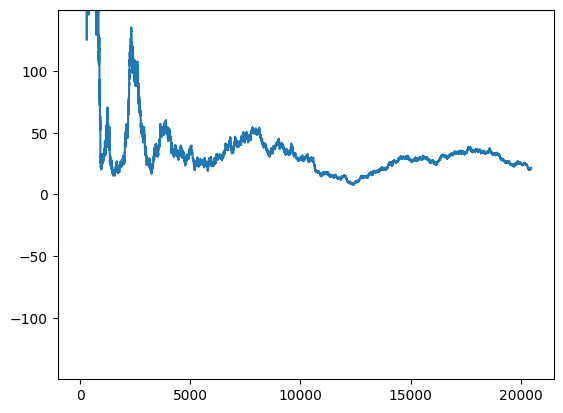

In [63]:
import matplotlib.pyplot as plt
values = np.nan_to_num(read_array_from_file("diff.bin", np.float64))
absmax = 0.01 * np.std(np.abs(values))

plt.plot(values)
plt.ylim(-absmax, absmax)
plt.show()


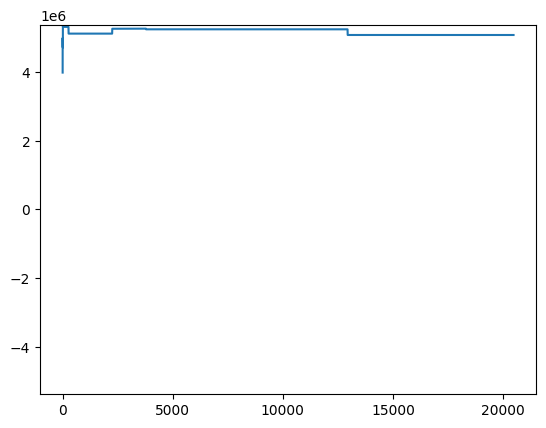

In [13]:
import matplotlib.pyplot as plt
values = np.nan_to_num(read_array_from_file("diff2.bin", np.float64))
absmax = np.max(np.abs(values))

plt.plot(values)
plt.ylim(-absmax, absmax)
plt.show()


In [22]:
import sys
import numpy as np
import matplotlib.pyplot as plt

def read_array_from_file(filename, dtype=float):
  """
  Reads an array of the specified data type from a binary file.

  Args:
      filename (str): The name of the file to read from.
      dtype (dtype, optional): The data type of the elements in the array.
          Defaults to float.

  Returns:
      numpy.ndarray: The array read from the file.
  """

  with open(filename, "rb") as file:
    # Read the size of the array
    size = np.fromfile(file, dtype=int, count=1)[0]

    # Read the array elements
    data = np.fromfile(file, dtype=np.float32, count=size)

  return data

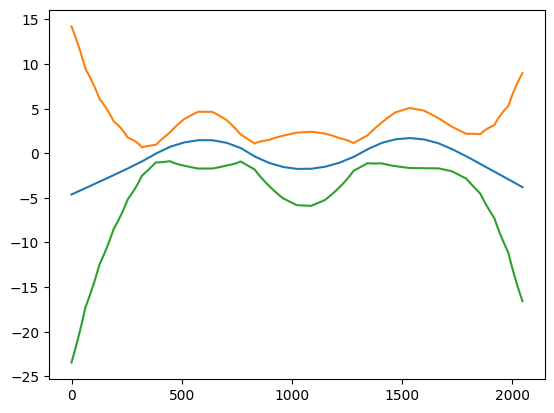

: 

In [ ]:
muVec = read_array_from_file("./muVec.bin")[1:]
stdVec = np.sqrt(read_array_from_file("./varVec.bin")[1:])

plt.plot(muVec, label='mean')
plt.plot(muVec + 2 * stdVec, label='upper')
plt.plot(muVec - 2 * stdVec, label='lower')

plt.show()